In [1]:
! pip3 install pandas
import pandas as pd

In [2]:
import numpy as np
import pandas as pd
# from sklearn.datasets import load_wine
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Предсказание пола по полным отзывам

In [3]:
from google.colab import files
files.upload()

Saving Финальный датасет.csv to Финальный датасет.csv


{'Финальный датасет.csv': b',stars,name,feedback,avg_sent,gender,num_words,emoji\r\n0,5,\xd0\x9f\xd0\xb0\xd0\xb2\xd0\xb5\xd0\xbb,\xd0\x9c\xd0\xb0\xd1\x82\xd0\xb5\xd1\x80\xd0\xb8\xd0\xb0\xd0\xbb \xd0\xbf\xd0\xbb\xd0\xbe\xd1\x82\xd0\xbd\xd1\x8b\xd0\xb9  \xd1\x85\xd0\xbe\xd1\x80\xd0\xbe\xd1\x88\xd0\xb8\xd0\xb9  \xd0\x9e\xd1\x87\xd0\xb5\xd0\xbd\xd1\x8c \xd1\x81\xd1\x82\xd0\xb8\xd0\xbb\xd1\x8c\xd0\xbd\xd0\xbe \xd1\x81\xd0\xbc\xd0\xbe\xd1\x82\xd1\x80\xd0\xb8\xd1\x82\xd1\x81\xd1\x8f  \xd0\x9f\xd0\xbe\xd0\xba\xd1\x83\xd0\xbf\xd0\xba\xd0\xbe\xd0\xb9 \xd0\xb4\xd0\xbe\xd0\xb2\xd0\xbe\xd0\xbb\xd0\xb5\xd0\xbd ,2.6666666666666665,M,8,0\r\n1,5,\xd0\xa2\xd0\xb0\xd1\x80\xd0\xb0\xd0\xb1\xd1\x80\xd0\xb8\xd0\xbd \xd0\x9d\xd0\xb8\xd0\xba\xd0\xbe\xd0\xbb\xd0\xb0\xd0\xb9,\xd0\x9a\xd1\x80\xd1\x83\xd1\x82\xd0\xb0\xd1\x8f \xd0\xbc\xd0\xb0\xd0\xb9\xd0\xba\xd0\xb0  \xd0\x9c\xd0\xb0\xd1\x82\xd0\xb5\xd1\x80\xd0\xb8\xd0\xb0\xd0\xbb \xd0\xbf\xd0\xbb\xd0\xbe\xd1\x82\xd0\xbd\xd1\x8b\xd0\xb9 \xd0\xba\xd0\xb0\xd1\x87\xd0

In [4]:
data = pd.read_csv('Финальный датасет.csv')
data

,Unnamed: 0,stars,name,feedback,avg_sent,gender,num_words,emoji
0,0,5,Павел,Материал плотный хороший Очень стильно смотр...,2.666667,M,8,0
1,1,5,Тарабрин Николай,Крутая майка Материал плотный качетсвенный,2.500000,M,5,0
2,3,5,Горбатов Николай,Гуд,1.000000,M,1,0
3,4,5,Горбатов Николай,Гуд,1.000000,M,1,0
4,5,5,Олег,Плотный хлопок сидит по размеру,5.000000,M,5,0
...,...,...,...,...,...,...,...,...
1654,800,5,Юлия,👍🏻,1.000000,F,1,1
1655,801,5,Татьяна,Отличная футболка для сна Размер в размер,3.500000,F,7,0
1656,802,1,Захарова Ира,Махровая футболка есть такие кто захочет тако...,4.666667,F,14,0
1657,803,3,надежда,футболка как махровое полотенце отказалась,5.000000,F,5,0


In [5]:
data.drop(['Unnamed: 0'], axis =1, inplace=True) # выкинем ненужные колонки

In [6]:
data["gender"]=data["gender"].map({'M':1,'F':0}) 

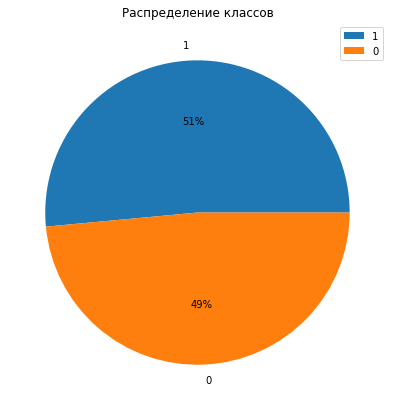

In [7]:
classes = pd.value_counts(data["gender"])

classes.plot(kind='pie',figsize=(7,7),autopct='%0.f%%', legend=True, title ="Распределение классов") 


plt.ylabel('')

plt.show()

## Переведем текстовые данные в количественные

In [8]:
data['feedback'] = data.feedback.apply(lambda x: str(x).lower())
data

,stars,name,feedback,avg_sent,gender,num_words,emoji
0,5,Павел,материал плотный хороший очень стильно смотр...,2.666667,1,8,0
1,5,Тарабрин Николай,крутая майка материал плотный качетсвенный,2.500000,1,5,0
2,5,Горбатов Николай,гуд,1.000000,1,1,0
3,5,Горбатов Николай,гуд,1.000000,1,1,0
4,5,Олег,плотный хлопок сидит по размеру,5.000000,1,5,0
...,...,...,...,...,...,...,...
1654,5,Юлия,👍🏻,1.000000,0,1,1
1655,5,Татьяна,отличная футболка для сна размер в размер,3.500000,0,7,0
1656,1,Захарова Ира,махровая футболка есть такие кто захочет тако...,4.666667,0,14,0
1657,3,надежда,футболка как махровое полотенце отказалась,5.000000,0,5,0


In [9]:

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_df=0.9, min_df=2, max_features=100) # можно менять параметры векторайзера

feature_matrix = vectorizer.fit_transform(data.feedback)

In [10]:
# добавим эту матрицу к датафрейму
import scipy.sparse

word_features= pd.DataFrame.sparse.from_spmatrix(feature_matrix)
# print(word_features.shape)


data = pd.concat([data, word_features], axis=1).dropna()

In [ ]:
#data

In [11]:
etalon = data.drop(['name','feedback'], axis=1)
display(etalon.head(2))

,stars,avg_sent,gender,num_words,emoji,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,...,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,5,2.666667,1,8,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.408216,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.468701,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.516597,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5,2.500000,1,5,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.563188,0.0,0.0,0.505875,0.0,0.417536,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Датасет готов, можно начинать обучение.




 Разделим данные на матрицу и целевую переменную

In [12]:

data2 = etalon.drop('gender', axis=1)
X = data2.values
display(X, X.shape)

array([[ 5.        ,  2.66666667,  8.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 5.        ,  2.5       ,  5.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 5.        ,  1.        ,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.        ,  4.66666667, 14.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 3.        ,  5.        ,  5.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 3.        ,  8.        , 24.        , ...,  0.35169531,
         0.        ,  0.        ]])

(1659, 104)

In [13]:
y = data['gender'].values # отдельно вынесли массив со значениями скорости ветра
display(y, y.shape)

array([1, 1, 1, ..., 0, 0, 0])

(1659,)

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=25)

In [15]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import classification_report

Random forest

In [17]:
forest = RandomForestClassifier(n_estimators=5000, verbose=1)
forest.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 5000 out of 5000 | elapsed:   17.3s finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=1, warm_start=False)

In [18]:
forest_y_pred = forest.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 5000 out of 5000 | elapsed:    0.9s finished


In [19]:
print(classification_report(y_test, forest_y_pred))

              precision    recall  f1-score   support

           0       0.68      0.57      0.62       173
           1       0.60      0.70      0.65       159

    accuracy                           0.64       332
   macro avg       0.64      0.64      0.63       332
weighted avg       0.64      0.64      0.63       332



Boosting

In [20]:
from sklearn.ensemble import GradientBoostingClassifier

In [21]:
gb_clf = GradientBoostingClassifier(n_estimators=5000, random_state=10, verbose=1)

In [22]:
gb_clf.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           1.3601           22.03s
         2           1.3403           23.86s
         3           1.3223           23.30s
         4           1.3075           22.99s
         5           1.2944           22.76s
         6           1.2820           22.75s
         7           1.2720           22.70s
         8           1.2629           22.58s
         9           1.2524           22.63s
        10           1.2446           22.68s
        20           1.1778           21.70s
        30           1.1362           20.73s
        40           1.1021           20.48s
        50           1.0747           20.59s
        60           1.0504           20.36s
        70           1.0270           20.53s
        80           1.0085           20.44s
        90           0.9894           20.34s
       100           0.9732           20.53s
       200           0.8463           20.35s
       300           0.7651           19.85s
       40

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=5000,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=10, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=1,
                           warm_start=False)

In [23]:
gb_y_pred = gb_clf.predict(X_test)

In [24]:
print(classification_report(y_test, gb_y_pred))

              precision    recall  f1-score   support

           0       0.65      0.54      0.59       173
           1       0.58      0.69      0.63       159

    accuracy                           0.61       332
   macro avg       0.61      0.61      0.61       332
weighted avg       0.62      0.61      0.61       332

